In [31]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
# plt.style.use('fivethirtyeight')

In [52]:
plt.rc('figure', dpi=200)
MEDIUM_SIZE = 14
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)

In [3]:
DTYPE = np.float32
FIGSIZE = (20, 5)
slice_size = (2301, 751)

## References

* (Sirgue et al., 2008): **3D Frequency Domain Waveform Inversion Using Time Domain Finite Difference MethodsNormal access**, L. Sirgue, J. T. Etgen and U. Albertin, 70th EAGE Conference and Exhibition incorporating SPE EUROPEC 2008

* (Witte et al., 2019), Philipp A. Witte, Mathias Louboutin, Fabio Luporini, Gerard J. Gorman, and Felix J. Herrmann, **Compressive least-squares migration with on-the-fly Fourier transforms**, GEOPHYSICS 0: 1-76. 

## Wavelets

According to (Sirgue et al., 2008), the source term $s_{DFT}(t)$ at time $t$ used at each time step is given by the inverse discrete Fourier transform (DFT) of the frequency domain (FD) source term:

$$s_{DFT}(t) = e^{-2\pi f t} S(f)$$

where $S(f)$ is the Fourier transform of a time-domain Ricker wavelet.

In [22]:
# Load the wavelets
ricker_10 = np.fromfile('user_defined_ricker_10hz.bin', dtype=DTYPE )
ricker_10_filtered_10 = np.fromfile('user_defined_ricker_10hz_filtered_10hz.bin', dtype=DTYPE )
ricker_20 = np.fromfile('user_defined_ricker_20hz.bin', dtype=DTYPE )
ricker_20_filtered_10 = np.fromfile('user_defined_ricker_20hz_filtered_10hz.bin', dtype=DTYPE )

In [23]:
# Time axis
time_step_in_seconds = 4e-4
start_time_in_seconds = 0.0
end_time_in_seconds = 2.0
t = np.arange(start_time_in_seconds, end_time_in_seconds, time_step_in_seconds)

dt = time_step_in_seconds
# dt = np.mean(np.diff(t))
print(f'dt is {dt}')

dt is 0.0004


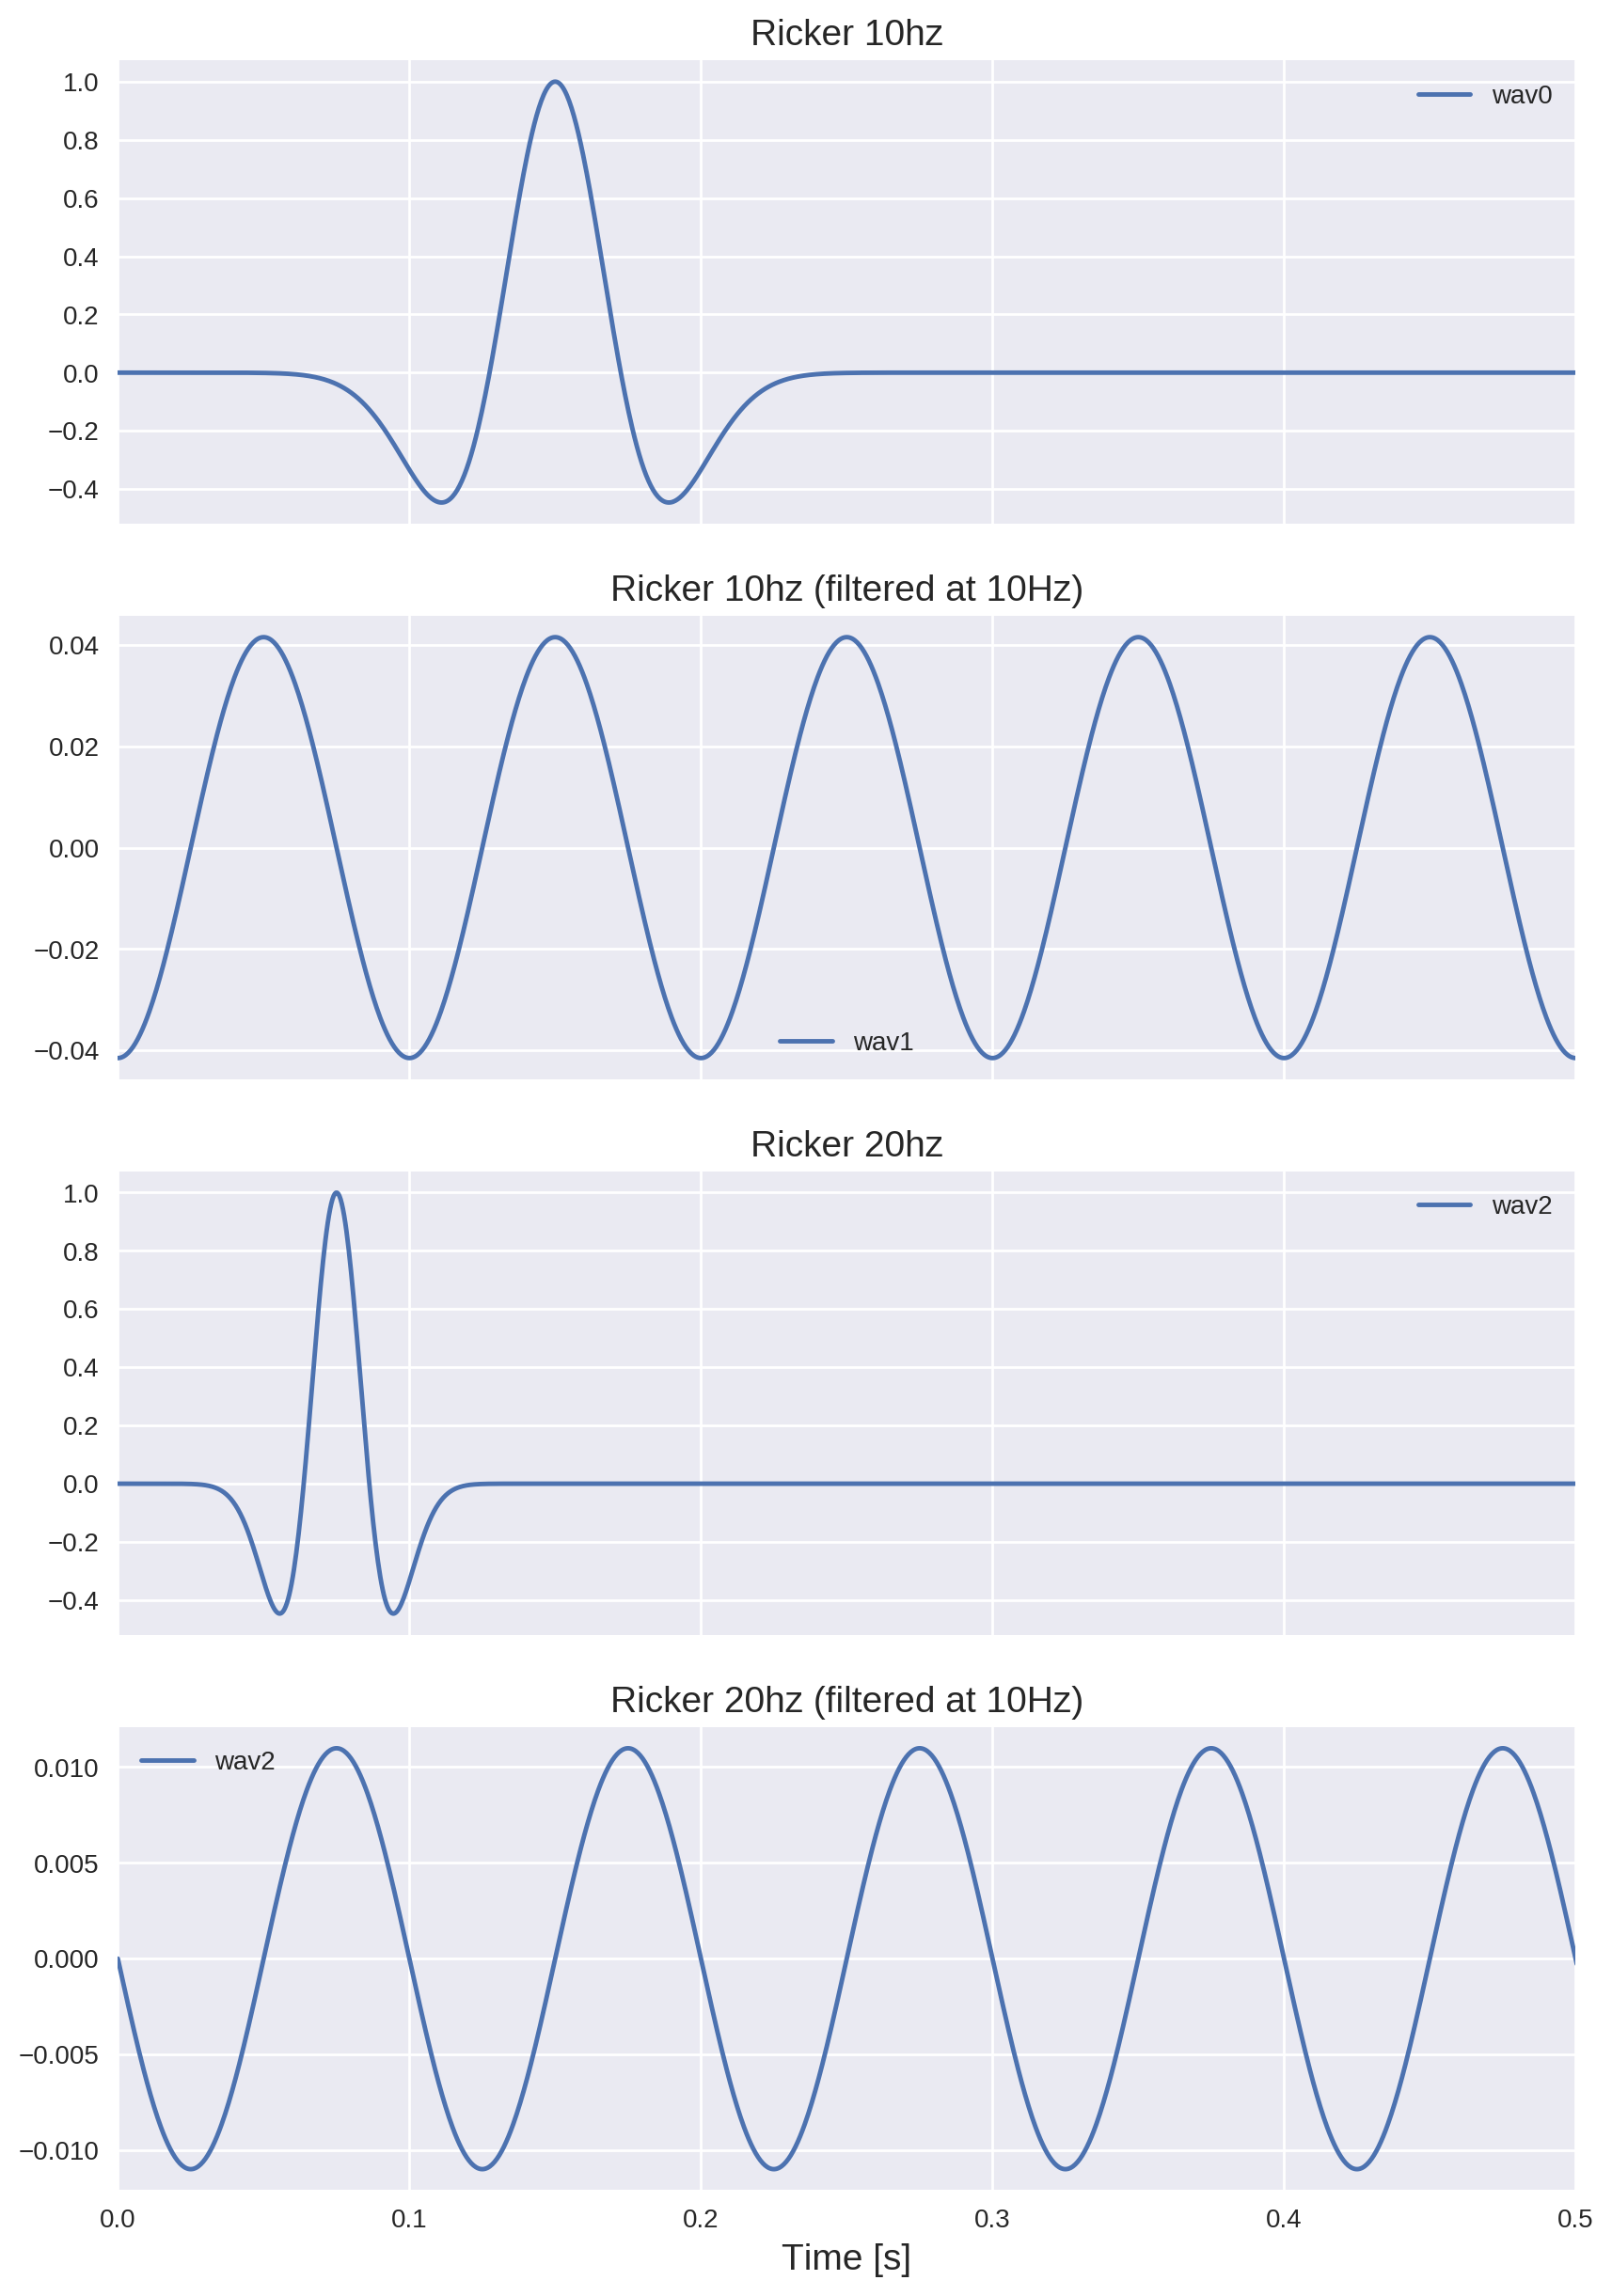

In [53]:
# Plot the wavelets
FIGSIZE = (10, 15)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=FIGSIZE, sharex=True, sharey=False)

_ = axes[0].plot(t, ricker_10, label='wav0')
_ = axes[0].set_title('Ricker 10hz')
_ = axes[0].legend()

_ = axes[1].plot(t, ricker_10_filtered_10, label='wav1')
_ = axes[1].set_title('Ricker 10hz (filtered at 10Hz)')
_ = axes[1].legend()

_ = axes[2].plot(t, ricker_20, label='wav2')
_ = axes[2].set_title('Ricker 20hz')
_ = axes[2].legend()

_ = axes[3].plot(t, ricker_20_filtered_10, label='wav2')
_ = axes[3].set_title('Ricker 20hz (filtered at 10Hz)')
_ = axes[3].legend()

_ = axes[3].set_xlim(0, 0.5)
_ = axes[3].set_xlabel('Time [s]')

## DFTs

In [4]:
dft_ricker_10 = np.fromfile('dft_ricker_10hz.bin', dtype=np.complex64).reshape(slice_size)
dft_ricker_10_filtered_10 = np.fromfile('dft_ricker_10hz_filtered_10hz.bin', dtype=np.complex64).reshape(slice_size)
dft_ricker_20 = np.fromfile('dft_ricker_20hz.bin', dtype=np.complex64).reshape(slice_size)
dft_ricker_20_filtered_10 = np.fromfile('dft_ricker_20hz_filtered_10hz.bin', dtype=np.complex64).reshape(slice_size)

In [5]:
dft0 = dft_ricker_10
dft1 = dft_ricker_10_filtered_10
dft2 = dft_ricker_20
dft3 = dft_ricker_20_filtered_10

In [6]:
print(dft0.real.max())
print(dft1.real.max())
print(dft2.real.max())
print(dft3.real.max())

4.3124305e-07
4.3853078e-07
4.4692024e-06
4.469322e-06


In [7]:
# dft0 /=dft0.max()
# dft1 /=dft1.max()

In [8]:
# dft_diff = dft0 - dft1

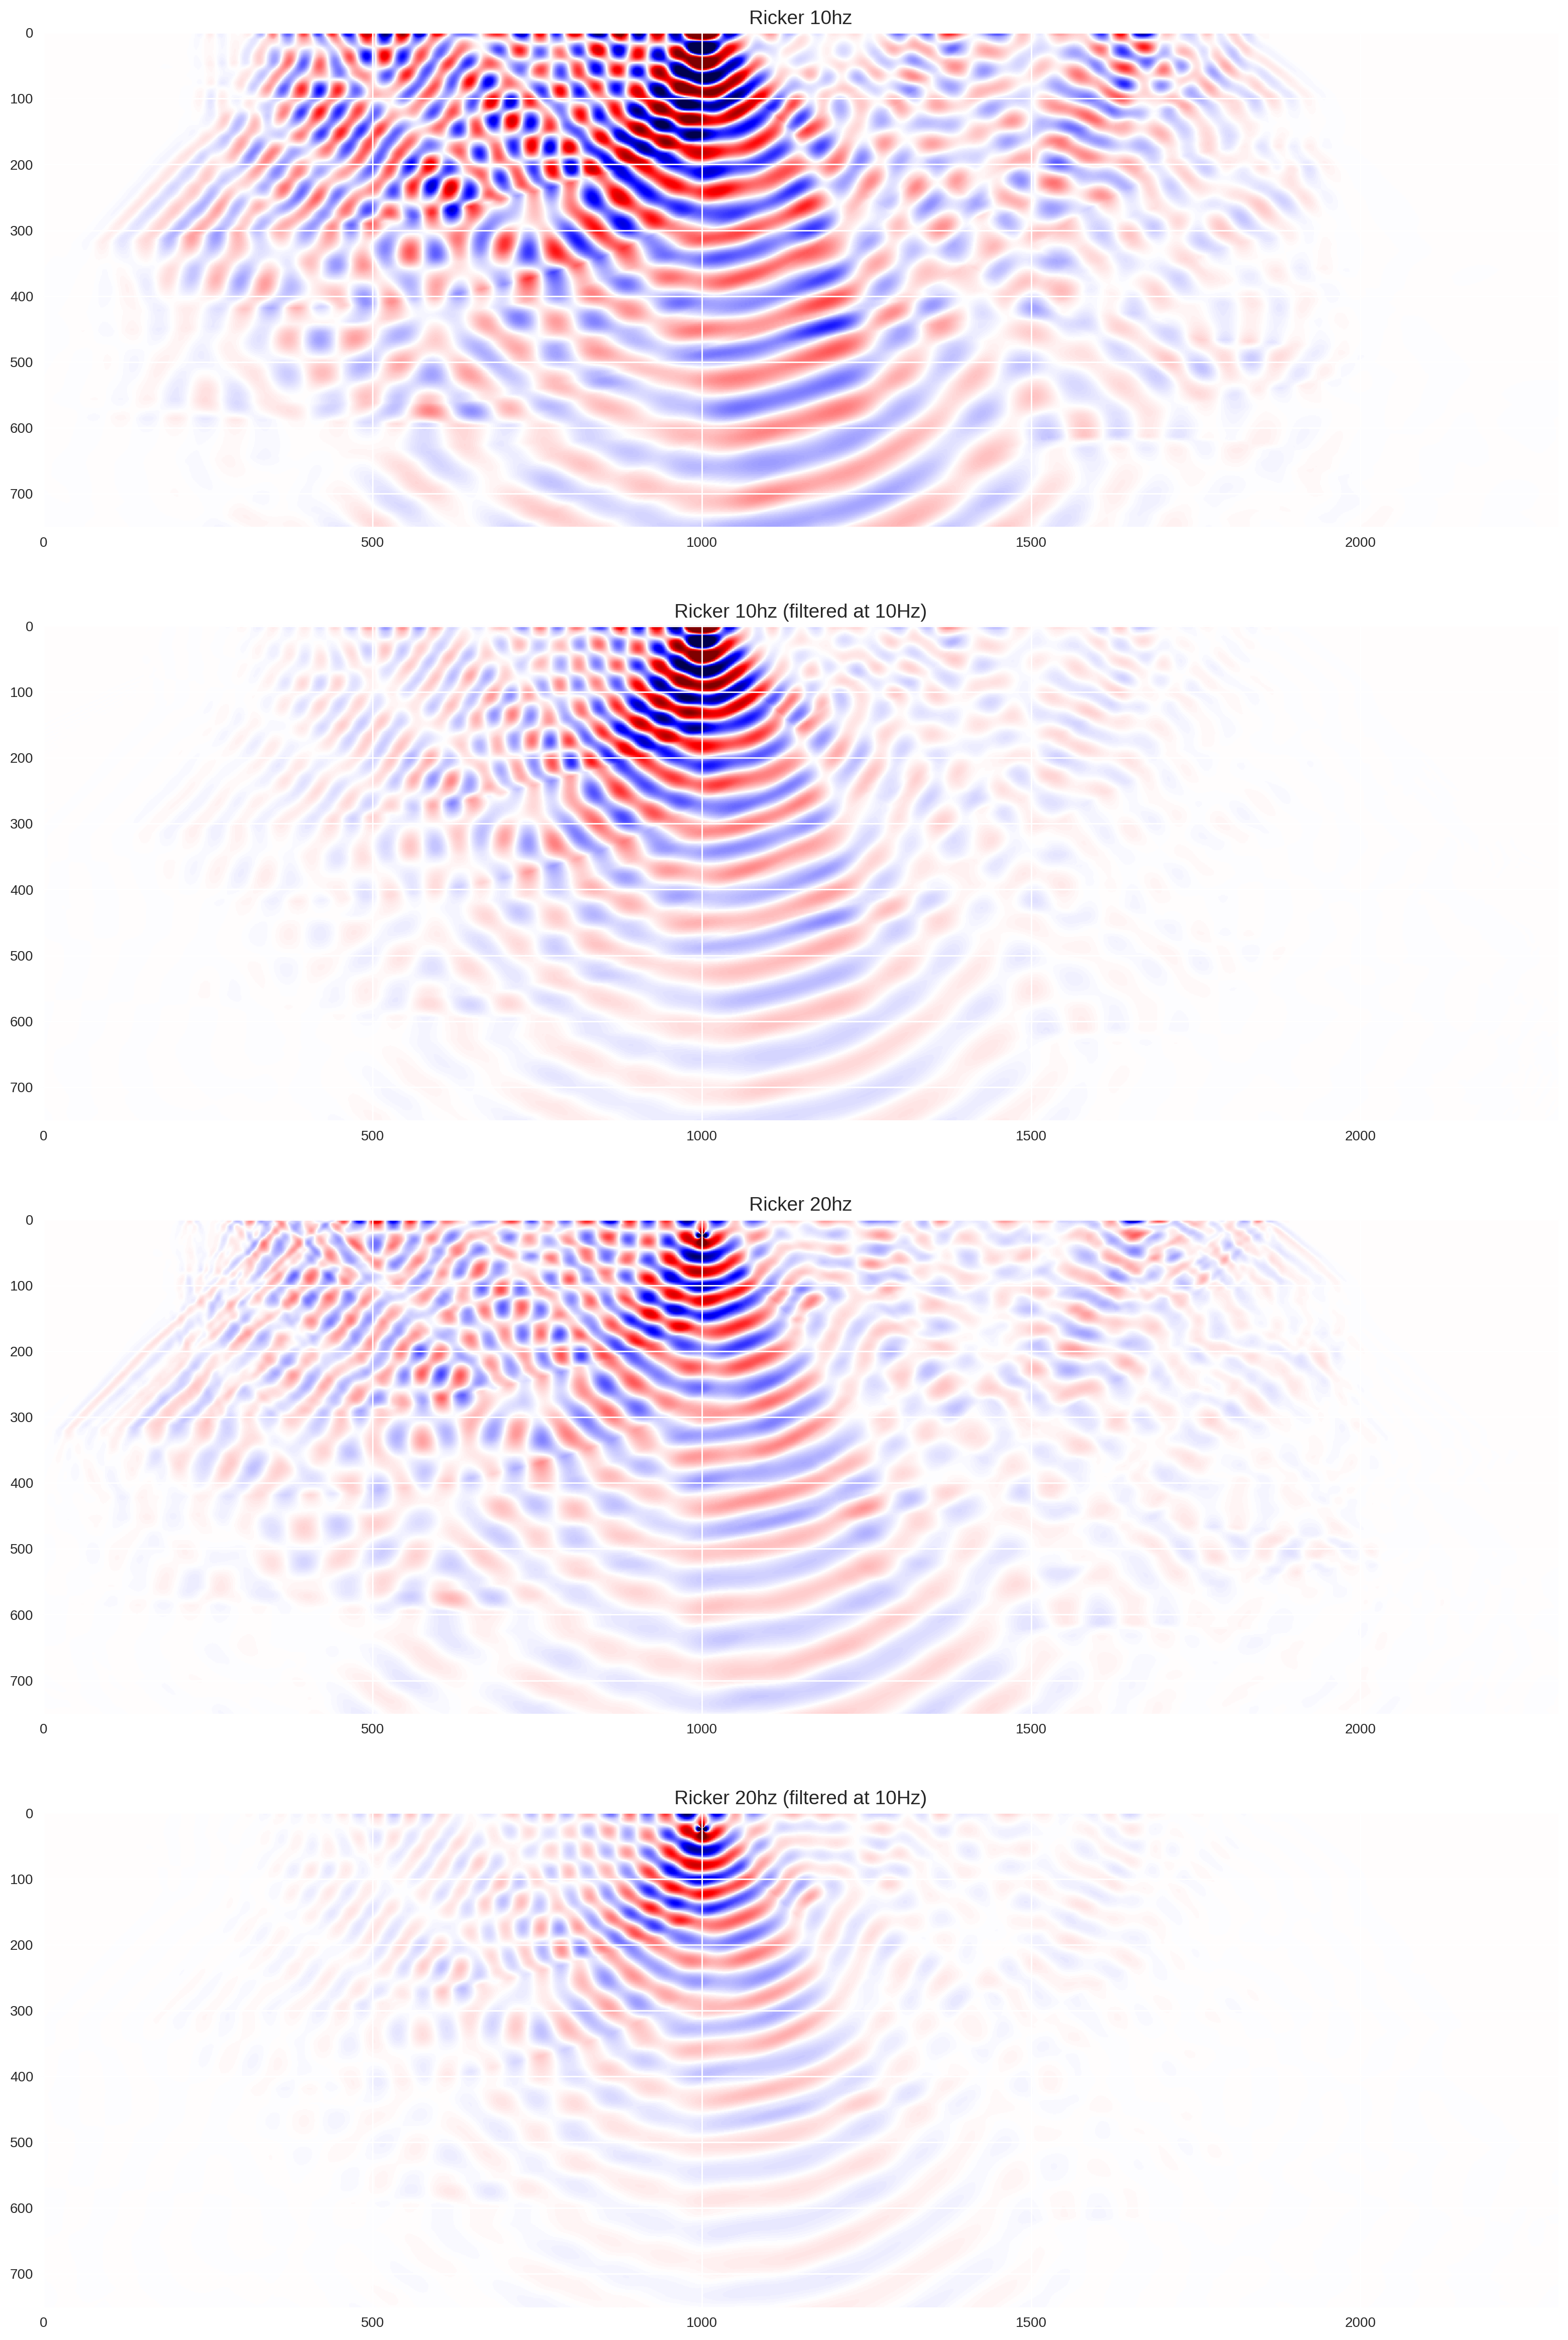

In [56]:
FIGSIZE = (20, 30)
fig, axes = plt.subplots(4, 1, figsize=FIGSIZE, sharex=False, sharey=False, facecolor='white')

clip=1e-7
vmin, vmax = -clip, clip

_ = axes[0].imshow(dft0.real.T, vmin=vmin, vmax=vmax, cmap=plt.cm.seismic)
_ = axes[0].set_title('Ricker 10hz')

clip=1e-7
vmin, vmax = -clip, clip

_ = axes[1].imshow(dft1.real.T, vmin=vmin, vmax=vmax, cmap=plt.cm.seismic)
_ = axes[1].set_title('Ricker 10hz (filtered at 10Hz)')

clip=5e-8
vmin, vmax = -clip, clip

_ = axes[2].imshow(dft2.real.T, vmin=vmin, vmax=vmax, cmap=plt.cm.seismic)
_ = axes[2].set_title('Ricker 20hz')

clip=5e-8
vmin, vmax = -clip, clip

_ = axes[3].imshow(dft3.real.T, vmin=vmin, vmax=vmax, cmap=plt.cm.seismic)
_ = axes[3].set_title('Ricker 20hz (filtered at 10Hz)')

In [57]:
gain = np.exp(np.arange(751)*0.0012)
# plt.plot(np.arange(751), gain)
gain=1

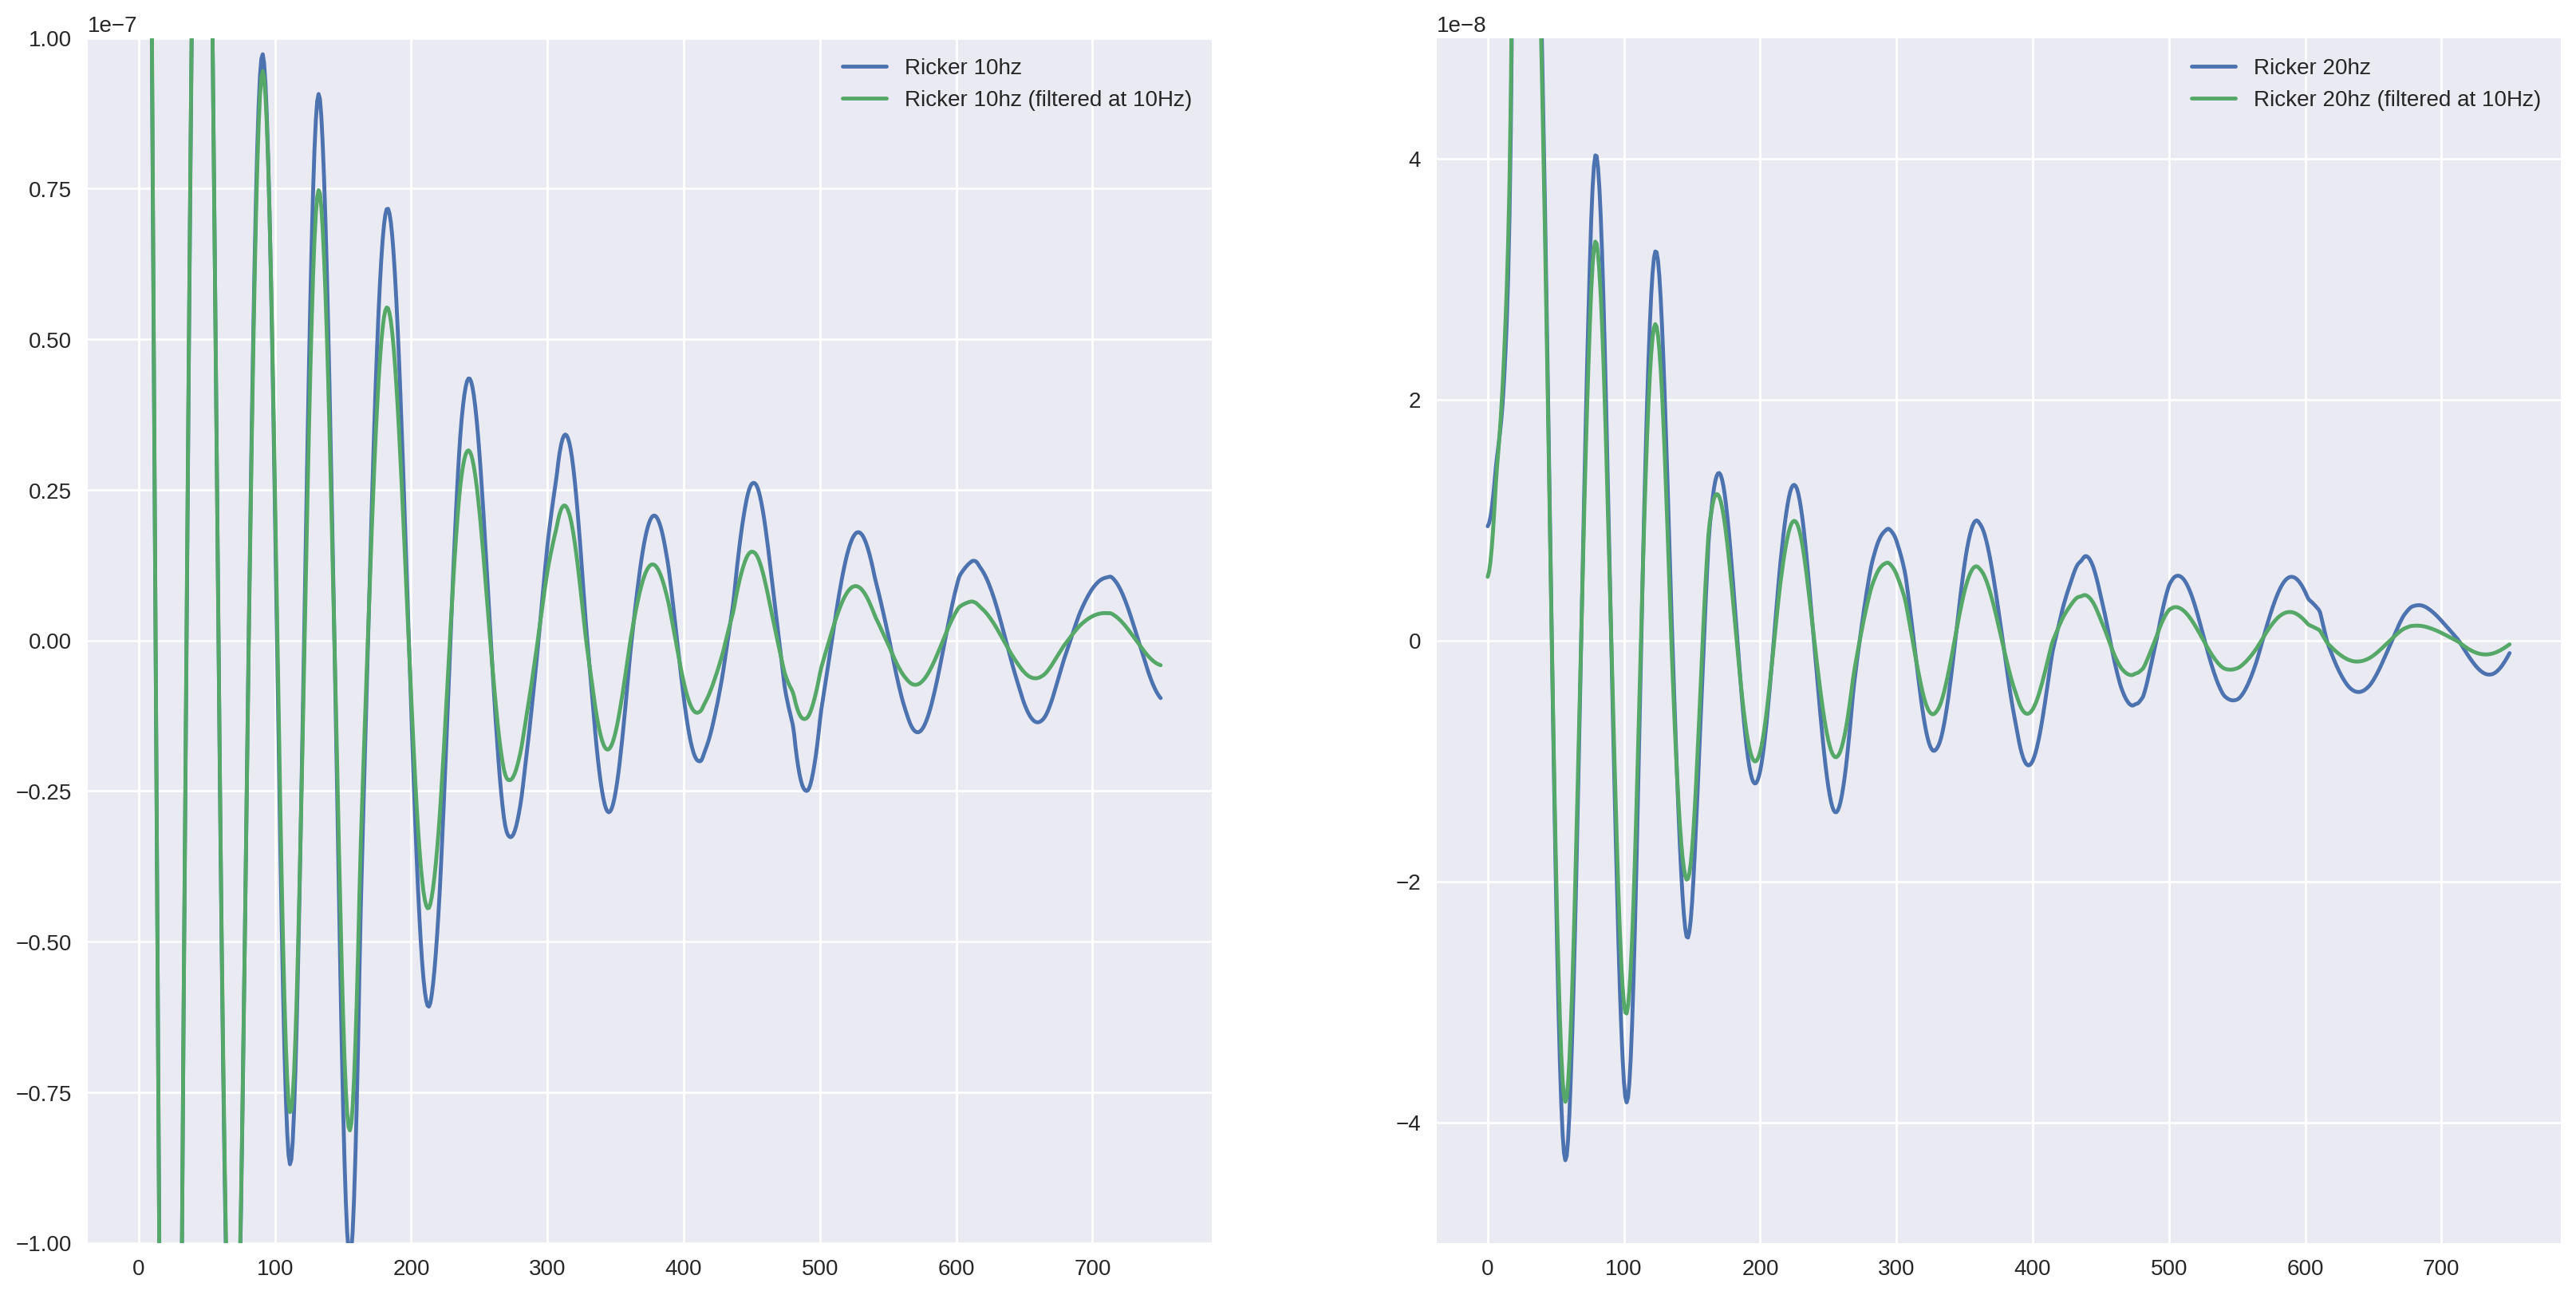

In [58]:
FIGSIZE = (20, 10)

i = 1000

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=FIGSIZE)

clip = 1e-7
# axes[0].plot(dft0.real[i, :]/dft0.real[i, :].max(), label='Ricker 10hz')
# axes[0].plot(gain * dft1.real[i, :]/dft1.real[i, :].max(), label='Ricker 10hz (filtered at 10Hz)')
axes[0].plot(dft0.real[i, :], label='Ricker 10hz')
axes[0].plot(gain * dft1.real[i, :], label='Ricker 10hz (filtered at 10Hz)')
axes[0].set_ylim(-clip, clip)
axes[0].legend()

coeff = 1
clip = 5e-8
# axes[1].plot(dft2.real[i, :]/dft2.real[i, :].max(), label='Ricker 20hz')
# axes[1].plot(gain * dft3.real[i, :]/dft3.real[i, :].max(), label='Ricker 20hz (filtered at 10Hz)')
axes[1].plot(dft2.real[i, :], label='Ricker 20hz')
axes[1].plot(gain * dft3.real[i, :], label='Ricker 20hz (filtered at 10Hz)')
axes[1].set_ylim(-clip, clip)
axes[1].legend()

## Questions

### Validation of DFTs

* Is it better to use a smooth version of the model?

### 3D implementation

* DFT of the entire volume?